C:\Users\khanh\AppData\Local\Temp\ipykernel_14988\655128731.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tiêu đề'][i] = list(news_dataset['Nội dung'][i].split('.'))[0]


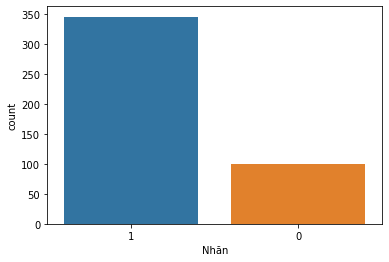

C:\Users\khanh\AppData\Local\Temp\ipykernel_14988\2265512805.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tiêu đề'][i] = text_preprocess(news_dataset['Tiêu đề'][i])
C:\Users\khanh\AppData\Local\Temp\ipykernel_14988\2265512805.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tác giả'][i] = text_preprocess(news_dataset['Tác giả'][i])
C:\Users\khanh\AppData\Local\Temp\ipykernel_14988\2265512805.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

[('của', 396), ('là', 320), ('và', 294), ('có', 270), ('người', 263), ('đã', 240), ('không', 234), ('được', 231), ('cho', 218), ('ở', 207), ('một', 203), ('trong', 202), ('các', 182), ('với', 177), ('khi', 171), ('năm', 160), ('để', 159), ('sau', 147), ('về', 142), ('nhiều', 132), ('này', 131), ('những', 121), ('việt_nam', 120), ('tại', 117), ('vào', 112), ('bị', 112), ('ông', 111), ('lại', 110), ('đi', 109), ('đến', 109), ('nhà', 107), ('từ', 107), ('ra', 103), ('cũng', 103), ('anh', 103), ('1', 101), ('cô', 100), ('bạn', 99), ('trên', 98), ('nhưng', 98), ('sẽ', 98), ('2', 95), ('vì', 92), ('ngày', 92), ('mà', 92), ('10', 92), ('thì', 92), ('hơn', 84), ('đó', 82), ('làm', 80), ('theanh28', 79), ('theo', 78), ('còn', 77), ('chỉ', 76), ('tuổi', 76), ('tiền', 73), ('mới', 72), ('trước', 72), ('biết', 70), ('con', 70), ('triệu', 69), ('như', 69), ('phải', 68), ('đang', 67), ('nước', 63), ('hai', 62), ('2022', 62), ('dân', 61), ('lao_động', 61), ('đồng', 60), ('tp', 59), ('nhất', 59), ('mì

C:\Users\khanh\AppData\Local\Temp\ipykernel_14988\308898851.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tiêu đề'][i] = remove_stopwords(news_dataset['Tiêu đề'][i])
C:\Users\khanh\AppData\Local\Temp\ipykernel_14988\308898851.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_dataset['Tác giả'][i] = remove_stopwords(news_dataset['Tác giả'][i])
C:\Users\khanh\AppData\Local\Temp\ipykernel_14988\308898851.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [8]:
%run data_preprocessing.ipynb

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

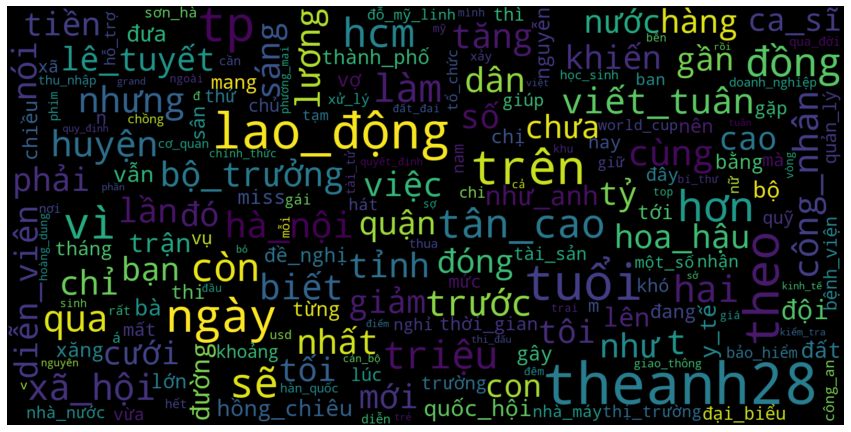

In [10]:
#trực quan hoá các từ xuất hiện trong tin thật
consolidated = ' '.join(word for word in news_dataset['Nội dung'][news_dataset['Nhãn'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

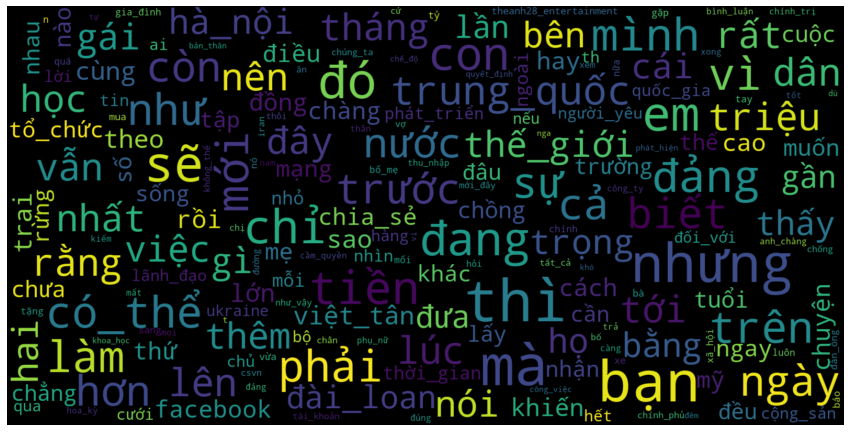

In [11]:
#trực quan hoá các từ xuất hiện trong tin giả
consolidated = ' '.join(word for word in news_dataset['Nội dung'][news_dataset['Nhãn'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'Biểu đồ cột thể hiện tần suất các từ xuất hiện nhiều nhất'}, xlabel='Những từ phổ biến nhất', ylabel='Số lần xuất hiện'>

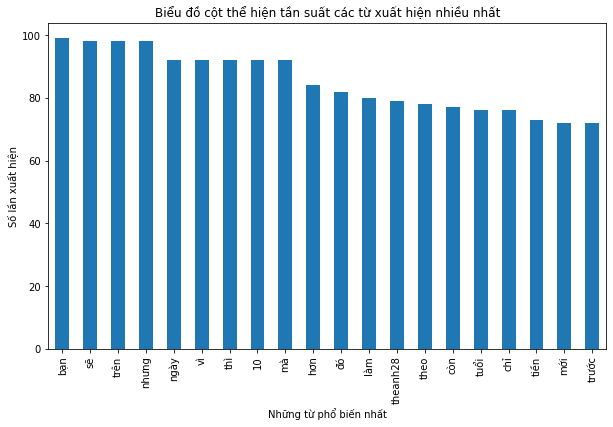

In [12]:
#vẽ biểu đồ cột của 20 từ phổ biến nhất
from sklearn.feature_extraction.text import CountVectorizer
  
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]
  
  
common_words = get_top_n_words(news_dataset['Nội dung'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])
  
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Những từ phổ biến nhất",
    ylabel="Số lần xuất hiện",
    title="Biểu đồ cột thể hiện tần suất các từ xuất hiện nhiều nhất"
)